In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from llama_index.embeddings.ollama import OllamaEmbedding




In [2]:
# Step 1: Define the embedding model
embed_model = OllamaEmbedding(
    model_name="nomic-embed-text:latest",
    base_url="http://localhost:11434"
)

In [3]:
# Generate an embedding for a single sentence
single_embedding = embed_model.get_text_embedding("Embeddings represent text as numerical vectors in AI systems.")
#single_embedding = embed_model.get_text_embedding("Systems")


In [4]:
print(single_embedding)

[0.8501037955284119, 1.0144349336624146, -3.4893734455108643, -1.5138472318649292, 0.8507207036018372, -0.36804938316345215, 0.15226879715919495, -0.5973508358001709, -1.178842544555664, -0.2554496228694916, 0.006802016869187355, -0.12492598593235016, 1.9700199365615845, 1.055242657661438, -0.6031069755554199, 0.07329650223255157, -0.21122775971889496, -0.250061959028244, -0.47984224557876587, 0.44800683856010437, 0.349012553691864, -0.11276769638061523, -0.23596370220184326, 0.44165265560150146, 2.055844306945801, 0.2687133848667145, 0.38513725996017456, -0.15940052270889282, -0.975139856338501, -0.2170516699552536, 0.7580058574676514, -0.12895449995994568, 0.049277711659669876, -0.4367157816886902, -0.4292199909687042, -0.12076961249113083, 0.17816579341888428, 1.229027509689331, 0.22316338121891022, 0.4986327290534973, -0.4092217683792114, -0.45128774642944336, -0.7565638422966003, 0.8842934966087341, -0.3699743151664734, 0.40047869086265564, 0.4733743369579315, -1.421498417854309, 

In [5]:
print(f"Single embedding length: {len(single_embedding)}")

Single embedding length: 768


In [6]:


# Step 2: Define the statements
statements = [
    "The cat is on the mat.",                     # Set 1 - Stmt 1
    "The sun rises in the east.",                 # Unrelated - Stmt 2
    "The feline rests on the carpet.",            # Set 1 - Stmt 3
    "Artificial Intelligence is fascinating.",    # Set 2 - Stmt 4
    "Machine learning drives AI advancements.",   # Set 2 - Stmt 5
    "Birds fly in the sky.",                      # Unrelated - Stmt 6
    "Deep learning is a subset of AI.",           # Set 2 - Stmt 7
    "Cat and Cow are domestic animals",           # Set 1  - Stmt 8
    "Equity, mutual funds and stocks are various options to invest", # Set 3 - Stmt 9
    "Gold can be used as hedge towards the investement", # Set 3 - Stmt 10
    "Nifty and Sensex are major index in India", # Set 3 - Stmt 11
    "Nasdaq, Dow and S&P 100 are major index in India", # Set 3 - Stmt 12
]


In [7]:
# Step 3: Generate embeddings
embeddings = [embed_model.get_text_embedding(statement) for statement in statements]

In [8]:
len(embeddings)

12

In [9]:
# Step 4: Calculate cosine similarity
similarity_matrix = cosine_similarity(embeddings)

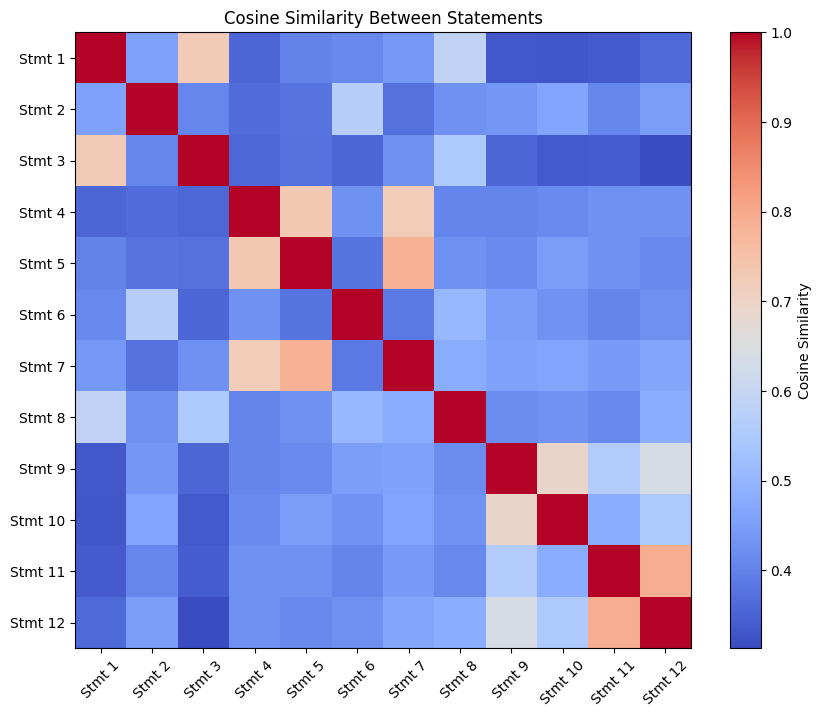

In [10]:
# Step 5: Visualize the similarity matrix
plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.xticks(range(len(statements)), [f"Stmt {i+1}" for i in range(len(statements))], rotation=45)
plt.yticks(range(len(statements)), [f"Stmt {i+1}" for i in range(len(statements))])
plt.title("Cosine Similarity Between Statements")
plt.show()

In [11]:

# Step 6: Analyze relationships in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


In [12]:
reduced_embeddings

array([[-12.90034975,   1.15919259],
       [ -2.88700183,  -5.14886802],
       [-12.32891046,   1.3223456 ],
       [  5.14890618,  10.610504  ],
       [  4.67665964,  11.56026168],
       [ -2.07866798,  -4.29570222],
       [  3.7666572 ,  10.31081962],
       [ -7.11641083,  -0.93936439],
       [  5.7547437 ,  -6.54448783],
       [  5.38224727,  -5.15727863],
       [  6.05273553,  -5.76127449],
       [  6.52939134,  -7.11614792]])

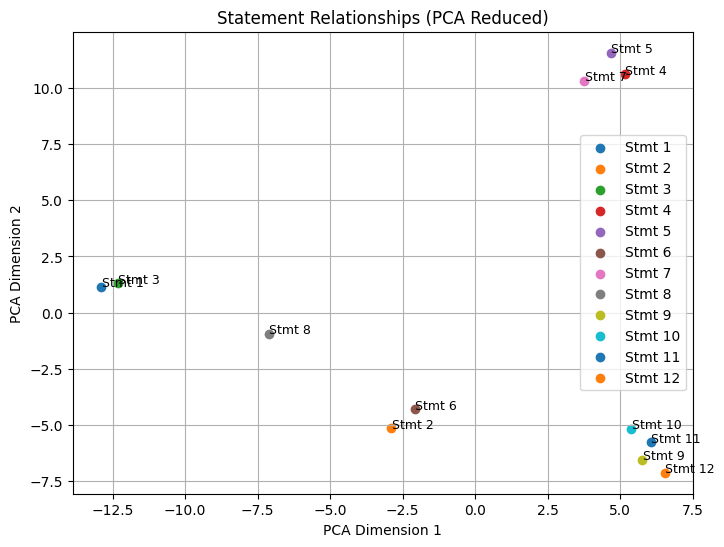

In [13]:

# Scatter plot to visualize relationships
plt.figure(figsize=(8, 6))
for i, (x, y) in enumerate(reduced_embeddings):
    plt.scatter(x, y, label=f"Stmt {i+1}")
    plt.text(x + 0.02, y, f"Stmt {i+1}", fontsize=9)

plt.title("Statement Relationships (PCA Reduced)")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend()
plt.grid()
plt.show()